In [ ]:
# Mount drive to access stored data
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
# Set the data path to where the datasets are stored
dataset_path = '/content/drive/My Drive/Difficult Words Data/DHH Adult Data/'

In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split

In [ ]:
# Load data from the Excel file
data = pd.read_excel(dataset_path + 'complete_adult_data2.xlsx')

In [ ]:
# Create and view a sample of the data, make sure it loaded correctly
sampled_data = data.sample(n=10)
print(sampled_data)

               word  length  syllables  senses  synonyms  hyponyms  hypernyms  \
5569      fractions       9          2       4         2         8          4   
12166      servants       8          2       2         4        11          2   
3586        dealing       7          2      15        38        46         14   
10377       powered       7          2       2         1         1          1   
2166           cats       4          1      10        38        12         10   
14293       unrated       7          3       0         0         0          0   
12462         skate       5          1       3         0        12          3   
13490  technologies      12          4       2         4        22          3   
3257     counselors      10          3       3         6         1          3   
8145           luke       4          1       2         5         0          0   

       subtitles  simple  subtlex  average  overall_label  
5569       -19.7   -17.4    -19.3   2.0909      

In [ ]:
# Specify the features (X) and the target variable (y)
X = data.drop(columns=['overall_label', 'word', 'average'])  # Features (excluding 'overall_label' and 'words' columns)
y = data['overall_label']  # Target variable

# Split the data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# The 'test_size' parameter specifies the fraction of data to be used for testing (in this case, 20%).
# The 'random_state' parameter ensures reproducibility of the split.

# Print the shapes of the resulting sets to verify the split
print("X_train shape:", X_train.shape)
print("X_test shape:", X_test.shape)
print("y_train shape:", y_train.shape)
print("y_test shape:", y_test.shape)

X_train shape: (12144, 9)
X_test shape: (3036, 9)
y_train shape: (12144,)
y_test shape: (3036,)


In [ ]:
from sklearn.tree import DecisionTreeClassifier

# Creating the decision tree classifier model
classifier = DecisionTreeClassifier(random_state=42)

# Fitting the model
classifier.fit(X_train, y_train)

# Test the model
y_pred = classifier.predict(X_test)

In [ ]:
from sklearn.metrics import accuracy_score

# Check the accuracy of the model
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

Accuracy: 0.7404479578392622


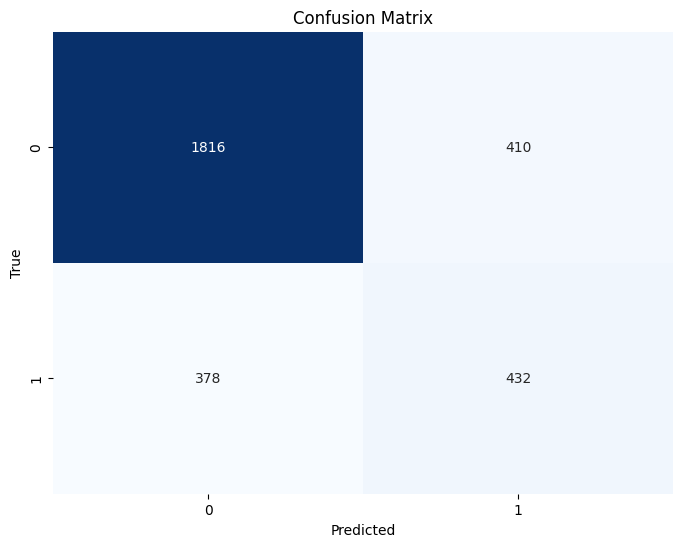

In [ ]:
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

# Creating a confusion matrix to better understand results
cm = confusion_matrix(y_test, y_pred)

# Plot the confusion matrix as a heatmap
plt.figure(figsize=(8, 6))  # Adjust the figure size as needed
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", cbar=False,
            xticklabels=classifier.classes_, yticklabels=classifier.classes_)
plt.xlabel("Predicted")
plt.ylabel("True")
plt.title("Confusion Matrix")
plt.show()

In [ ]:
# Displaying the decision tree
from sklearn.tree import plot_tree

# Plot the decision tree
plt.figure(figsize=(80, 64))  # Adjust the figure size as needed
plot_tree(classifier, feature_names=X_train.columns, class_names=True, filled=True, rounded=True)
plt.show()

Output hidden; open in https://colab.research.google.com to view.

In [ ]:
# New version with hyper parameter tuning
from sklearn.model_selection import RandomizedSearchCV

# Define the hyperparameter grid
param_dist = {
    'criterion': ['gini', 'entropy'],
    'max_depth': range(1, 31),
    'min_samples_split': range(2, 10),
    'min_samples_leaf': range(1, 4),
    'max_features': ['sqrt', 'log2', None]
}

# Create the RandomizedSearchCV object
tuned_classifier = RandomizedSearchCV(
    DecisionTreeClassifier(random_state=42), # Random state for model reproducability
    param_distributions=param_dist,
    n_iter=100,  # How many random combinations will be tested
    cv=5, # How many times the data will be divided for cross validation
    random_state=42 # Random state for RSCV Object reproducability
)

# Fit the random search to your data
tuned_classifier.fit(X_train, y_train)

# Test the model
y_pred = tuned_classifier.predict(X_test)

In [ ]:
# Test tuned model accuracy
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

Accuracy: 0.7977602108036891


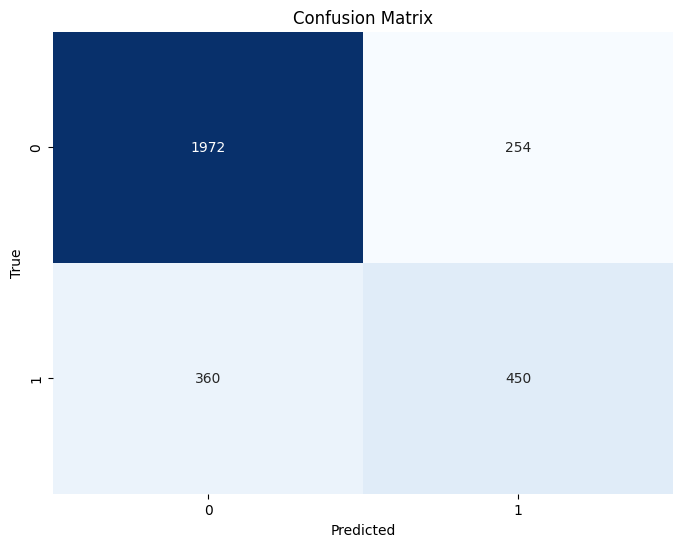

In [ ]:
# Creating a confusion matrix
cm = confusion_matrix(y_test, y_pred)

# Plot the confusion matrix as a heatmap
plt.figure(figsize=(8, 6))  # Adjust the figure size as needed
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", cbar=False,
            xticklabels=classifier.classes_, yticklabels=classifier.classes_)
plt.xlabel("Predicted")
plt.ylabel("True")
plt.title("Confusion Matrix")
plt.show()

In [ ]:
# Plot the tuned decision tree
plt.figure(figsize=(80, 64))  # Adjust the figure size as needed
plot_tree(classifier, feature_names=X_train.columns, class_names=True, filled=True, rounded=True)
plt.show()

Output hidden; open in https://colab.research.google.com to view.

In [ ]:
# Exporting model
import joblib

# Save the model
joblib.dump(tuned_classifier, 'decisionTree_child_model.pkl')

['decisionTree_child_model.pkl']